#### Computation Describtion

In this competition you are given driver images, each taken in a car with a driver doing something in the car (texting, eating, talking on the phone, makeup, reaching behind, etc). Your goal is to predict the likelihood of what the driver is doing in each picture.

In [1]:
#Importing Libraries 
import tensorflow as tf

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import Model
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Dense,Dropout,Activation, Conv2D, InputLayer, Reshape, MaxPooling2D, Flatten
from tensorflow import keras

import cv2

In [2]:
df=pd.read_csv("driver_imgs_list.csv") 

## EDA

### Data Exploration
Examining the dataset to understand its structure, size, and the types of variables it contains.


In [3]:
len(df) # 22424 resimimiz var.

22424

In [4]:
df.head()

,subject,classname,img
0,p002,c0,img_44733.jpg
1,p002,c0,img_72999.jpg
2,p002,c0,img_25094.jpg
3,p002,c0,img_69092.jpg
4,p002,c0,img_92629.jpg


In [5]:
# We chose one of the images inside the train folder.
img = cv2.imread(r'C:\Users\melih\Desktop\Data Science(Yapay Zeka)\Kaggle 20 Projects\StateFarm Driver Reaction CV\imgs\train\c0\img_34.jpg')

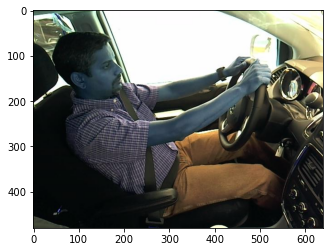

In [6]:
image = plt.imread(r'C:\Users\melih\Desktop\Data Science(Yapay Zeka)\Kaggle 20 Projects\StateFarm Driver Reaction CV\imgs\train\c0\img_34.jpg')

# Display one of the image
plt.imshow(img)
plt.show()

In [7]:
img.shape

(480, 640, 3)

#### Explanation

This function appears to be using the OpenCV library to read an image from a file at the given path, resize it to the specified dimensions img_rows and img_cols, and return the resulting image.

The function is using the optional color_type argument, which is set to 3 by default. This argument specifies the number of channels in the image. A value of 0 indicates a grayscale image, while a value of 3 indicates a 3-channel color image. In this case, the image is being read as grayscale by setting color_type to 0.

The function reads the image using the cv2.imread() function, which takes the file path and a flag indicating the way the image should be read. In this case, the flag is set to 0, which indicates that the image should be read as grayscale. The image is then resized using the cv2.resize() function, which takes the image and the desired dimensions as arguments. Finally, the resized image is returned.

In [8]:
def cv2_image(path, img_rows, img_cols, color_type=3):
    img = cv2.imread(path, 0)
    resized = cv2.resize(img, (img_rows, img_cols))
    return resized

### Data preprocessing
Transforming the data to make it suitable for modeling. This can include normalizing, scaling, or encoding categorical variables.

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
# Defining x and y, in this case, x is become our images and y our classnames (c0, c1, c2...)
x= df[['img']]
y= df[['classname']]

x_train, x_test, y_train, y_test =  train_test_split(x, y, test_size=0.33)

#### Create a Deep Learning Model

The model is defined as a sequential model, which means that the layers will be added in a linear fashion, with the output of one layer serving as the input to the next.

In [11]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 55,744
Trainable params: 55,744
Non-traina

#### Reading a set of images from a directory and resizing them

In [13]:
image_test_arr = []
for i in range(len(x_test)):
    path = r"C:\Users\melih\Desktop\Data Science(Yapay Zeka)\Kaggle 20 Projects\StateFarm Driver Reaction CV\imgs\train\{}\{}".format(y_test.iloc[i,0],x_test.iloc[i,0])
    resized= cv2_image(path,32,32)
    image_test_arr.append(resized)

In [14]:
image_train_arr = []
for i in range(len(x_train)):
    path = r"C:\Users\melih\Desktop\Data Science(Yapay Zeka)\Kaggle 20 Projects\StateFarm Driver Reaction CV\imgs\train\{}\{}".format(y_train.iloc[i,0],x_train.iloc[i,0])
    resized = cv2_image(path,32,32)
    image_train_arr.append(resized)

#### Converting to array

In [15]:
image_train_arr = np.array(image_train_arr)
image_test_arr = np.array(image_test_arr)

In [16]:
print(image_train_arr.shape, image_test_arr.shape)

(15024, 32, 32) (7400, 32, 32)


#### Normalizing the values of the training and test images by dividing them by 255.

In [17]:
image_train_arr,image_test_arr = image_train_arr/255, image_test_arr/255

#### Adding the final layers to the convolutional neural network (CNN) defined earlier.

In [18]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.add(Dense(10, activation='softmax'))

In [19]:
type(image_test_arr),type(y_test)

(numpy.ndarray, pandas.core.frame.DataFrame)

#### Reshaping 

In [20]:
image_train_arr = image_train_arr.reshape(15024,32,32,1)
image_test_arr = image_test_arr.reshape(7400,32,32,1)

In [21]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train['new_column']= label_encoder.fit_transform(y_train)
y_test['new_column'] = label_encoder.fit_transform(y_test)

C:\Users\melih\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


 For example, you might have a dataset with categorical labels like "red", "green", and "blue", and the label encoder would convert these labels into numerical values like 0, 1, and 2.

Label encoding is a simple and effective way to convert categorical labels into numerical values, but it has some limitations.

In [22]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(image_train_arr, y_train['new_column'], epochs=10,validation_data=(image_test_arr, y_test['new_column']))



Epoch 1/10


C:\Users\melih\anaconda3\lib\site-packages\keras\backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


470/470 [==============================] - 11s 22ms/step - loss: 1.5466 - accuracy: 0.4497 - val_loss: 0.7379 - val_accuracy: 0.7538
Epoch 2/10
470/470 [==============================] - 10s 20ms/step - loss: 0.4492 - accuracy: 0.8633 - val_loss: 0.3355 - val_accuracy: 0.9020
Epoch 3/10
470/470 [==============================] - 10s 21ms/step - loss: 0.2148 - accuracy: 0.9393 - val_loss: 0.2071 - val_accuracy: 0.9424
Epoch 4/10
470/470 [==============================] - 10s 22ms/step - loss: 0.1387 - accuracy: 0.9589 - val_loss: 0.1682 - val_accuracy: 0.9532
Epoch 5/10
470/470 [==============================] - 11s 23ms/step - loss: 0.0954 - accuracy: 0.9720 - val_loss: 0.1918 - val_accuracy: 0.9439
Epoch 6/10
470/470 [==============================] - 10s 22ms/step - loss: 0.0643 - accuracy: 0.9822 - val_loss: 0.1261 - val_accuracy: 0.9655
Epoch 7/10
470/470 [==============================] - 11s 23ms/step - loss: 0.0562 - accuracy: 0.9822 - val_loss: 0.1254 - val_accuracy: 0.9655
Epo

232/232 - 1s - loss: 0.1416 - accuracy: 0.9670 - 1s/epoch - 6ms/step


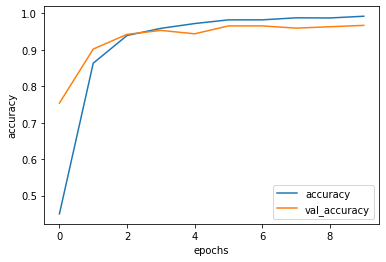

In [23]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(loc='lower right')

test_loss,test_accuracy = model.evaluate(image_test_arr, y_test['new_column'], verbose = 2)

In [24]:
test_data = pd.read_csv('sample_submission.csv')
test_data.shape

(79726, 11)

In [25]:
test_arr = []
for i in range(len(test_data)):
#     print((X_train.loc[i,'']))
#     print(y_train.iloc[i,0],X_train.iloc[i,0])
#     break

    path = r"C:\Users\melih\Desktop\Data Science(Yapay Zeka)\Kaggle 20 Projects\StateFarm Driver Reaction CV\imgs\test\{}".format(test_data.iloc[i,0])
    resized = cv2_image(path,32,32)
    test_arr.append(resized)

In [26]:

test_arr=np.array(test_arr)

In [27]:
test_arr_norm =test_arr/255.0

In [28]:
test_arr_norm= test_arr_norm.reshape(79726,32,32,1)

In [29]:
test_output_arr = model.predict(test_arr_norm)

2492/2492 [==============================] - 15s 6ms/step


In [30]:
test_output_prob = pd.DataFrame(test_output_arr)

In [31]:
type(test_output_prob)

pandas.core.frame.DataFrame

In [32]:
for i in range (len(test_output_prob.columns)):
    test_output_prob["c{}".format(i)] = test_output_prob.iloc[:,i]
print(test_output_prob.columns)

Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9, 'c0', 'c1',
       'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9'],
      dtype='object')


In [33]:
test=test_output_prob.drop([0,1,2,3,4,5,6,7,8,9], axis = 1) 

In [34]:
result = pd.concat([test_data.iloc[:,0], test], axis=1)

In [35]:
result.to_csv(r'result.csv',index=False)